# Single neuron Calcium Imaging

This notebook has the code to extract Calcium traces from the single neuron recordings on ZIM01.

In [4]:
#Unet
#import pckgs
import cv2
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
from numpy import unravel_index
import os
from natsort import natsorted
from imutils.src import imfunctions
import glob
from pathlib import Path
import shutil
import single_cell_imaging_functions as ca_image

### Option 1: Binarize using make_contour based binary

In [2]:
input_filepath='/scratch/zimmer/DanielM/BAG_RFP_max/2021-07-05_17-45-15_worm1_onfood-channel-0rfp_raw.btf'
output_filepath='/scratch/zimmer/DanielM/BAG_RFP_max/2021-07-05_17-45-15_worm1_onfood-channel-0-pco_camera1_binary.btf'
median_blur=3
lt=140
ht=255
contour_size=2000
tolerance=0.5
area_to_fill=100
imfunctions.make_contour_based_binary(input_filepath, output_filepath, median_blur, lt, ht, contour_size, tolerance, area_to_fill)

NameError: name 'imfunctions' is not defined

In [3]:
#To check what areas the contour size and tolerance parameters give:
contour_size=500
tolerance=0.5
print(contour_size*(1-tolerance))
print(contour_size*(1+tolerance))

250.0
750.0


### Option 2: Binarize only with blur and threshold

In [6]:
input_filepath='/scratch/zimmer/DanielM/bag_zim_06/9.9/2021-09-06bag_zim06/btiffs/2021-09-06_19-05-32_worm4_on-channel-0-Andor3972bigtiff.btf'
output_filepath='/scratch/zimmer/DanielM/bag_zim_06/9.9/2021-09-06bag_zim06/btiffs/2021-09-06_19-05-32_worm4_on-channel-0-Andor3972bigtiff_binary.btf'
median_blur=3
lower_threshold=2000
higher_threshold=255
ca_image.binarize_btf(input_filepath,output_filepath,median_blur,lower_threshold,higher_threshold)

NameError: name 'ca_image' is not defined

## option 1 for all worms

In [7]:
input_filepath=Path(r'/scratch/zimmer/DanielM/ZIM443_RFP_max/')
median_blur=3
lt=140
ht=255
for input_file in input_filepath.glob('*.btf'): 
    outputpath_filename=ca_image.get_new_file_names(input_file,output_path,add_to_name,file_extension)
    print(outputpath_filename)
    

/scratch/zimmer/DanielM/2021-07-15_14-27-22_zim443_wor2_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_15-33-13_zim443_wor3_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_16-39-13_zim443_wor4_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_16-49-36_zim443_wor4_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-14_18-24-00_zim443_wor1_off-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_15-12-30_zim443_wor3_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_17-14-13_zim443_wor5_off-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_13-26-57_zim443_wor1_off-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_14-27-22_zim443_wor2_on-channel-0rfp_raw_binary_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_15-33-13_zim443_wor3_on-channel-0rfp_raw_binary_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM

In [8]:
#binarize only with blur and threshhold for all worms
input_filepath=Path(r'/scratch/zimmer/DanielM/ZIM443_RFP_max/')
median_blur=3
lt=140
ht=255
for input_file in input_filepath.glob('*.btf'): 
    outputpath_filename=ca_image.get_new_file_names(input_file,output_path,add_to_name,file_extension)
    ca_image.binarize_btf(input_file,outputpath_filename,median_blur,lower_threshold,higher_threshold)
print('done')

KeyboardInterrupt: 

### Transform GCAMP Channel if needed
This will transform the GCAMP Channel in case the camera alignment was not good.

In [13]:
gcamp_filepath='/scratch/zimmer/DanielM/bag_zim_06/9.9/2021-09-06bag_zim06/btiffs/2021-09-06_19-05-32_worm4_on-channel-1-Andor9046bigtiff_subsampled.btf'
output_filepath='/scratch/zimmer/DanielM/bag_zim_06/9.9/2021-09-06bag_zim06/btiffs/2021-09-06_19-05-32_worm4_on-channel-1-Andor9046bigtiff_subsampled_wrongly_transformed.btf'

In [88]:
with tiff.TiffWriter(output_filepath, bigtiff=True) as tif_writer,\
    tiff.TiffFile(gcamp_filepath, multifile=False) as tif_gcamp:
    
    for i, page in enumerate(tif_gcamp.pages):
        
        img=page.asarray()
        
        #create the transformation matrix 
        M = np.float32([[1, 0, -20], [0, 1, 10]])
        
        #transform it based on the transformation matrix
        shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
        
        #flip if needed
        flipped = cv2.flip(shifted, 1)
        
        #save the processed Gcamp channel
        tif_writer.write(shifted, contiguous=True)

/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: TiffFile: the 'multifile' argument is ignored
  


In [7]:
median_blur=3
lower_threshold=2000
higher_threshold=255

In [2]:
gcamp_filepath='/scratch/zimmer/DanielM/bag_zim_06/9.9/2021-09-06bag_zim06/btiffs/2021-09-06_19-05-32_worm4_on-channel-0-Andor3972bigtiff_subsampled.btf'
mask_filepath='/scratch/zimmer/DanielM/bag_zim_06/9.9/2021-09-06bag_zim06/btiffs/2021-09-06_19-05-32_worm4_on-channel-1-Andor9046bigtiff_subsampled_wrongly_transformed.btf'

/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: TiffFile: the 'multifile' argument is ignored
  This is separate from the ipykernel package so we can avoid doing imports until
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: TiffFile: the 'multifile' argument is ignored
  after removing the cwd from sys.path.


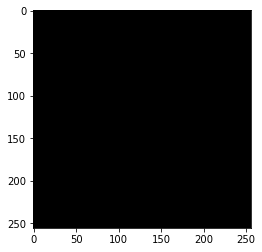

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/core/src/arithm.cpp:681: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'arithm_op'


In [33]:
import cv2

with tiff.TiffFile(mask_filepath, multifile=True) as tif_mask,\
        tiff.TiffFile(gcamp_filepath, multifile=False) as tif_gcamp:
    
        for i, page in enumerate(tif_mask.pages):
            
            #if i %5==0:
                
            if i == 1834:
        
        
                
                gcamp=tif_gcamp.pages[i].asarray()
                rfp=tif_mask.pages[i].asarray()
                
                #apply median Blur
                
                img=cv2.medianBlur(gcamp,3)

                #apply threshold
                ret, gcamp = cv2.threshold(img,lower_threshold,higher_threshold,cv2.THRESH_BINARY)
                
                #distance transform of gcamp
                rfp = rfp.astype('uint8')
                gcamp = gcamp.astype('uint8')
                gcamp = cv2.distanceTransform(gcamp,cv2.DIST_L2,3)
                rfp = cv2.distanceTransform(rfp,cv2.DIST_L2,3)
                
                #plt.show()
                
                
                
                 # display stuff
                #plt.imshow(gcamp,cmap="gray")
                gcamp_color = cv2.cvtColor(gcamp,cv2.COLOR_GRAY2RGB)
                
                
                rfp_color = cv2.cvtColor(rfp,cv2.COLOR_GRAY2RGB)
                
                gcamp_color[:, :, 0]=0 
                rfp_color[:, :, 1]=0 
                #plt.imshow(rfp_color)
                plt.show()
                
                
                
                plt.imshow(gcamp_color)
                plt.show()
                
                
                gcamp_color = gcamp_color.astype('uint8')
                composite=cv2.addWeighted(src1=gcamp_color,alpha=0.5,src2=rfp_color,beta=0.5,gamma=0)
                #plt.imshow(composite)
                plt.show()
                
                #acalculate displacement 
                windwow_size=np.array([2,2])
                global_maxima=[]
                all_global_maxima_difference=[]

                
    
                arr_gfp=gcamp
                arr_rfp=rfp
            

In [ ]:
channels=[arr_rfp,arr_gfp]

global_maxima=[]

slide_column=int(arr_rfp.shape[1]/2)
slide_row=int(arr_rfp.shape[0]/2)

slide_column


for channel in channels:

    #create matrix with 2x2 means
    all_window_means=[]

    for row in range(slide_row):
    
        all_window_means_columns=[]
    
        for column in range(slide_column):
        
                window=channel[row*2:(row*2)+2, column*2:(column*2)+2]
                window_mean=window.mean()

In [181]:
window

array([[0., 0.],
       [0., 0.]], dtype=float32)

/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: TiffFile: the 'multifile' argument is ignored
  
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: TiffFile: the 'multifile' argument is ignored
  import sys


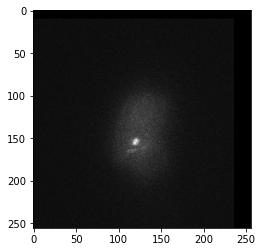

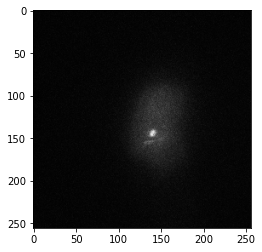

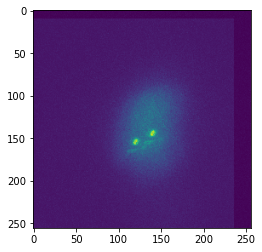

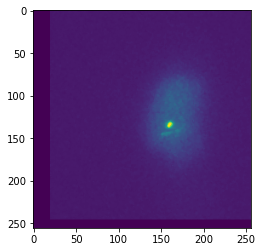

In [89]:
import cv2

slide_column=int(arr_rfp.shape[1]/2)
slide_row=int(arr_rfp.shape[0]/2)

with tiff.TiffFile(mask_filepath, multifile=True) as tif_mask,\
        tiff.TiffFile(gcamp_filepath, multifile=False) as tif_gcamp:
    
        for i, page in enumerate(tif_mask.pages):
            
            #if i %100==0:
                
            if i == 1834:
        
        
                
                gcamp=tif_gcamp.pages[i].asarray()
                rfp=tif_mask.pages[i].asarray()
                
                #apply median Blur
                
                img=cv2.medianBlur(gcamp,median_blur)

                #apply threshold
                #ret, gcamp = cv2.threshold(img,lower_threshold,higher_threshold,cv2.THRESH_BINARY)
                
                #distance transform of gcamp
                #rfp = rfp.astype('uint8')
                #gcamp = gcamp.astype('uint8')
                #gcamp = cv2.distanceTransform(gcamp,cv2.DIST_L2,3)
                #rfp = cv2.distanceTransform(rfp,cv2.DIST_L2,3)
                
                
                
                 # display stuff
                #plt.imshow(gcamp,cmap="gray")
                
                #gcamp_color = gcamp.astype('uint8')
                #rfp_color = rfp.astype('uint8')
                composite=cv2.addWeighted(src1=gcamp,alpha=0.5,src2=rfp,beta=0.5,gamma=0)
                
                
                plt.imshow(rfp,cmap="gray")
                plt.show()
                
                plt.imshow(gcamp,cmap="gray")
                plt.show()
                
                
                plt.imshow(composite)
                plt.show()
                
                
                
                
                #acalculate displacement 
                windwow_size=np.array([2,2])
                global_maxima=[]
                all_global_maxima_difference=[]

                
    
                arr_gfp=gcamp
                arr_rfp=rfp
            
                slide_column=int(arr_rfp.shape[1]/2)
                slide_row=int(arr_rfp.shape[0]/2)
            
    
                channels=[arr_gfp,arr_rfp]

                global_maxima=[]


                for channel in channels:

                    #create matrix with 2x2 means
                    all_window_means=[]

                    for row in range(slide_row):
    
                        all_window_means_columns=[]
    
                        for column in range(slide_column):
        
                            window=channel[row*2:(row*2)+2, column*2:(column*2)+2]
                            window_mean=window.mean()
        
                            all_window_means_columns.append(window_mean)
                

        
                            #convert to list
                            all_window_means=list(all_window_means)
           
                        #append
                        all_window_means.append(all_window_means_columns)
    
                        #convert to array to find maxima
                        all_window_means=np.array(all_window_means)
            
            
            
    
                        #get index of maximal values
                        index_mean=np.array(unravel_index(all_window_means.argmax(), all_window_means.shape))

            
    
                    #recover original index
                    global_max_index=np.array(windwow_size*index_mean)
                    global_maxima.append(global_max_index)
    
            #calcualte displacement and stor it in list
                global_maxima_difference=global_maxima[0]-global_maxima[1]
        all_global_maxima_difference.append(global_maxima_difference)
                #calculate coordinate difference between max values
    


    
            #calcualte mean of displacement in x and y axis. 
        all_global_maxima_difference=np.array(all_global_maxima_difference)

        mean_of_displacement=all_global_maxima_difference.mean(axis=0)

            #
        displacement_y=int(mean_of_displacement[0])
        displacement_x=int(mean_of_displacement[1])

                #TODO pass these values to the transformation matrix
        
        
        M = np.float32([[1, 0, displacement_x], [0, 1, displacement_y]])
        
        #transform it based on the transformation matrix
        shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
        
        plt.imshow(shifted)
        plt.show()
                
                
                
                
               
                
            
    

In [84]:

global_maxima


[array([144, 138]), array([136, 168])]

In [85]:
displacement_x

8

In [86]:
displacement_y

-30

In [175]:
window=channel[0*2:(0*2)+2, 0*2:(0*2)+2]
window_mean=window.mean()
window_mean

0.0

In [76]:
rfp = np.array([[5,3,4,5,6,4,2,4,5,8],
             [4,5,8,5,2,3,6,4,1,7],
             [8,3,5,8,5,2,5,9,9,4],
               [8,3,5,8,5,2,5,9,9,4]])

In [109]:
slide_column=int(channel.shape[1]/2)
slide_row=int(channel.shape[0]/2)

window_size=np.array([2,2])
global_maxima=[]


all_window_means=[]   
for row in range(slide_row):

    all_window_means_columns=[]
    
    for column in range(slide_column):
        
        window=rfp[row*2:(row*2)+2, column*2:(column*2)+2]
        window_mean=window.mean()
        
        all_window_means_columns.append(window_mean)
    
        all_window_means=list(all_window_means)
           
#append
    all_window_means.append(all_window_means_columns)
    
    
    
    
    #convert to array to find maxima
    all_window_means=np.array(all_window_means)
            
            
            
    
    #get index of maximal values
    index_mean=np.array(unravel_index(all_window_means.argmax(), all_window_means.shape))

            
    
    #recover original index
    
global_max_index=np.array(windwow_size*index_mean)
global_maxima.append(global_max_index)
    

/users/daniel.mitic/.conda/envs/python-cvcourse/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/users/daniel.mitic/.conda/envs/python-cvcourse/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [111]:
global_maxima

[array([ 0, 10])]

In [105]:
window_size

array([2, 2])

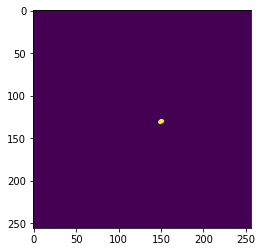

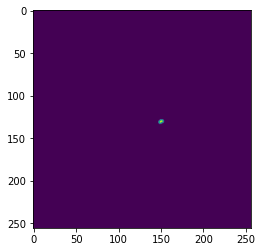

In [13]:
plt.imshow(gcamp)
plt.show()
gcamp = gcamp.astype('uint8')
gcamp_dist_transform = cv2.distanceTransform(gcamp,cv2.DIST_L2,3)
plt.imshow(dist_transform)
plt.show()


In [11]:
print(gcamp.dtype)

uint16


In [1]:
gcamp.shape

NameError: name 'gcamp' is not defined

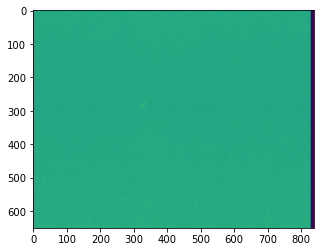

In [46]:
gcamp_color = cv2.cvtColor(gcamp,cv2.COLOR_GRAY2RGB)
plt.imshow(gcamp)

In [47]:
gcamp_color[:, :, 0]=0    # Zero out contribution from green
#gcamp_color[:, :, 2] = 0 

In [48]:
gcamp_color

array([[[  0, 107, 107],
        [  0, 107, 107],
        [  0, 101, 101],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 105, 105],
        [  0, 106, 106],
        [  0, 102, 102],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 100, 100],
        [  0, 106, 106],
        [  0, 106, 106],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0, 103, 103],
        [  0, 104, 104],
        [  0, 101, 101],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 100, 100],
        [  0, 101, 101],
        [  0, 105, 105],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 103, 103],
        [  0, 101, 101],
        [  0, 100, 100],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

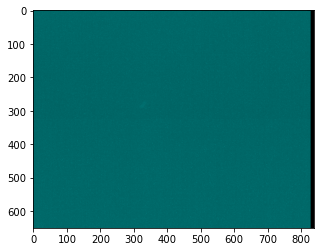

In [49]:
plt.imshow(gcamp_color)

In [41]:
green=gcamp_color[0, :, 0]=0   

TypeError: Invalid shape () for image data

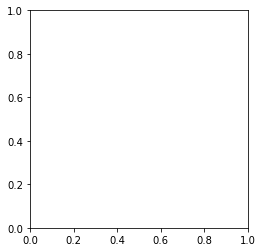

In [ ]:
lide_column=int(gfp_2.shape[1]/2)
slide_row=int(gfp_2.shape[0]/2)

slide_column

In [ ]:
#over how many pages should the displacement be calculated. 
iterations_gfp=[gfp,gfp_2]
iterations_rfp=[rfp,rfp_2]

In [23]:
#arguments for function: btifs for rfp and gfp chanel, window size, number of pages for average. 
windwow_size=np.array([2,2])


global_maxima=[]
all_global_maxima_difference=[]

for iteration in range(iterations):
    
    arr_gfp=iterations_gfp[iteration]
    arr_rfp=iterations_rfp[iteration]
    
    channels=[arr_rfp,arr_gfp]

    global_maxima=[]


    for channel in channels:

        #create matrix with 2x2 means
        all_window_means=[]

        for row in range(slide_row):
    
            all_window_means_columns=[]
    
            for column in range(slide_column):
        
                window=channel[row*2:(row*2)+2, column*2:(column*2)+2]
                window_mean=window.mean()
        
                all_window_means_columns.append(window_mean)
                

        
                #convert to list
                all_window_means=list(all_window_means)
           
            #append
            all_window_means.append(all_window_means_columns)
    
            #convert to array to find maxima
            all_window_means=np.array(all_window_means)
            
            
            
    
            #get index of maximal values
            index_mean=np.array(unravel_index(all_window_means.argmax(), all_window_means.shape))

            
    
        #recover original index
        global_max_index=np.array(windwow_size*index_mean)
        global_maxima.append(global_max_index)
    
    #calcualte displacement and stor it in list
    global_maxima_difference=global_maxima[0]-global_maxima[1]
    all_global_maxima_difference.append(global_maxima_difference)
    #calculate coordinate difference between max values
    


    
#calcualte mean of displacement in x and y axis. 
all_global_maxima_difference=np.array(all_global_maxima_difference)

mean_of_displacement=all_global_maxima_difference.mean(axis=0)

displacement_x=int(mean_of_displacement[0])
displacement_y=int(mean_of_displacement[0])

#TODO pass these values to the transformation matrix

NameError: name 'iterations' is not defined

In [41]:
def plot_gcamp_rfp_ratio(gcamp_signal,rfp_signal):
    fig, axes=plt.subplots(figsize=(20,5),nrows=3, dpi=150)
    axes[0].plot(gcamp_signal)
    axes[0].set_ylabel('GCamp',fontsize=15)
    axes[1].plot(rfp_signal)
    axes[1].set_ylabel('RFP',fontsize=15)
    axes[2].plot(gcamp_signal/rfp_signal)
    axes[2].set_ylabel('GCamp/RFP',fontsize=15)
    return axes

### calculate and plot the ratiometric signal for a single recording

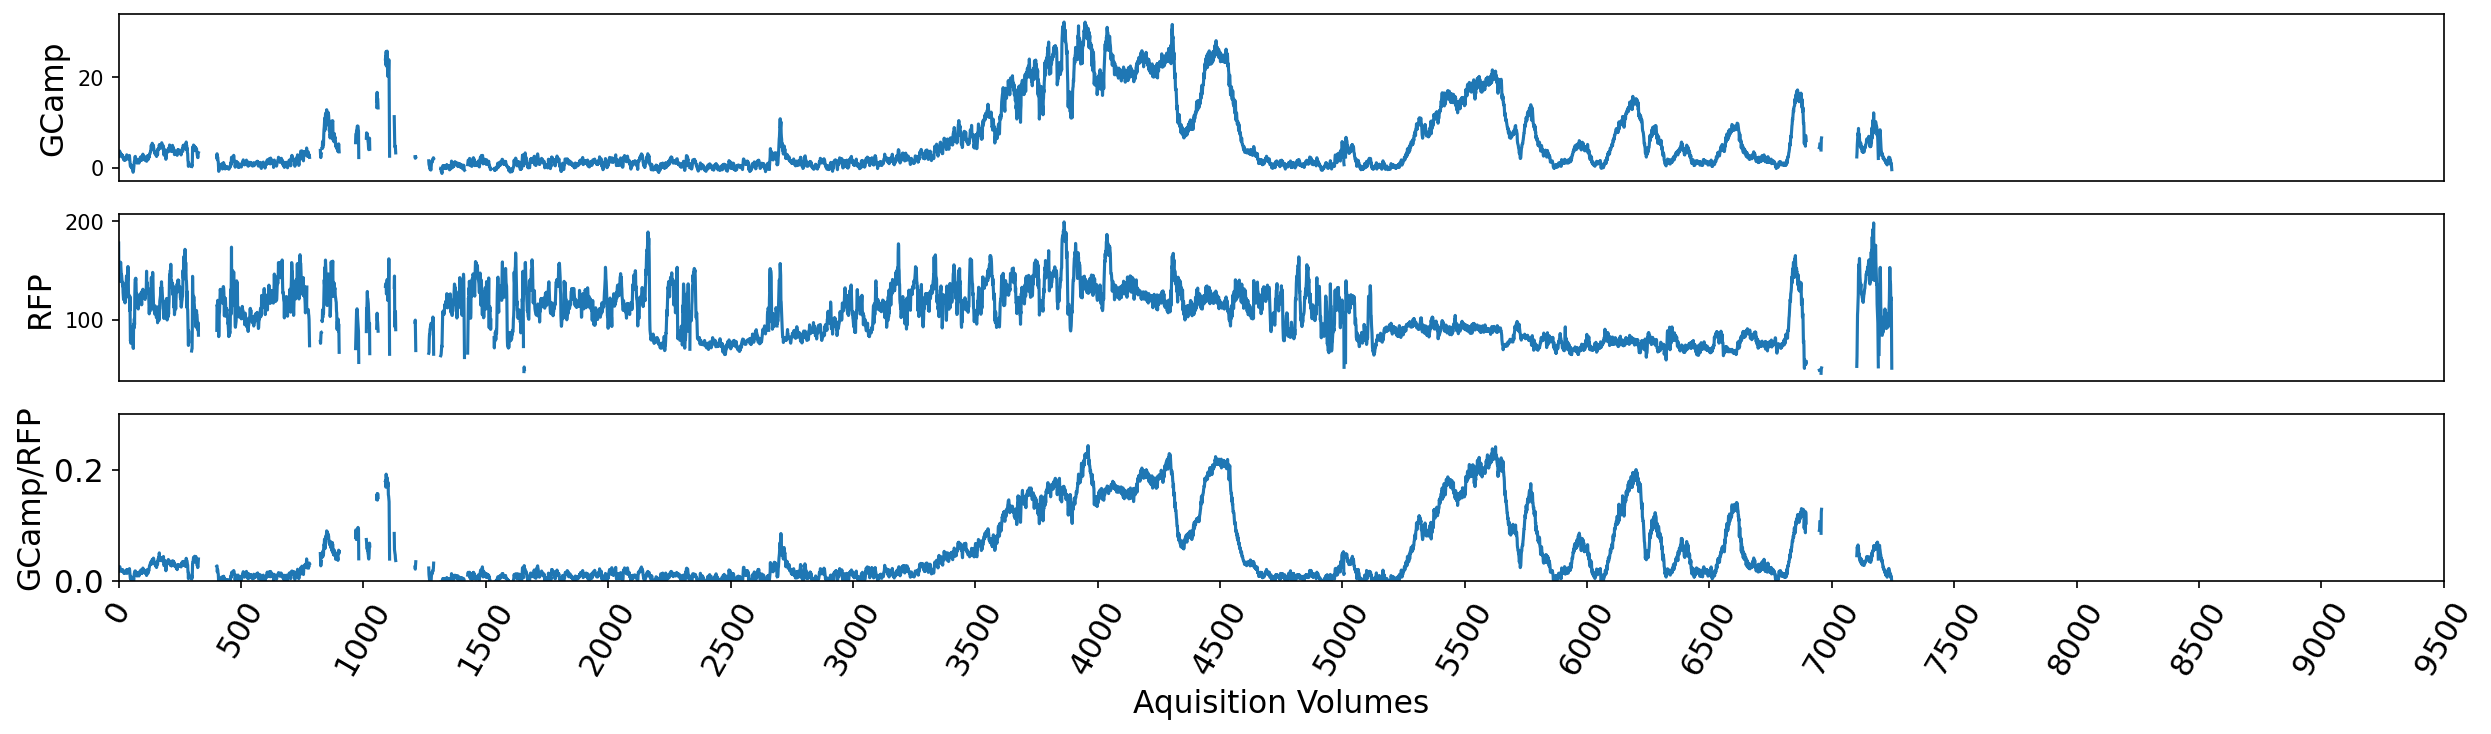

In [77]:
#function to calculate and plot the signal
#make sure that vecotrs have same lenght with asser
rfp_mask_filepath='/scratch/zimmer/DanielM/zim01/BAG_RFP_max/binary/2021-07-20_15-13-27_bagworm3_on-channel-0rfp_raw_binary.btf'
gcamp_filepath='/scratch/zimmer/DanielM/zim01/BAG_GFP_max/BAG_GFP_MAX_CORRECTED/2021-07-20_15-13-27_bagworm3_on-channel-1.btf'
rfp_filepath='/scratch/zimmer/DanielM/zim01/BAG_RFP_max/2021-07-20_15-13-27_bagworm3_on-channel-0rfp_raw.btf'
background_gfp=104
background_red=104


#calculate signal
#gcamp_signal, rfp_signal=ca_image.calculate_signal(rfp_filepath,rfp_mask_filepath,gcamp_filepath,background_red,background_gfp)
#gcamp_signal=np.delete(gcamp_signal,np.s_[3000:4600])
#rfp_signal=np.delete(rfp_signal,np.s_[3000:4600])
#gcamp_signal=gcamp_signal[3000:4600]
#rfp_signal=rfp_signal[3000:4600]



In [ ]:
#plot signal
axes=plot_gcamp_rfp_ratio(gcamp_signal,rfp_signal)

#some modifications to the plot

for i,ax in enumerate(axes):
    ax.set_xlim([0, 9500])
    if i<2: 
        ax.set_xticks([])
        plt.yticks(fontsize=15)
    if i==2:
        ax.tick_params(axis='x', labelrotation = 60)
        ax.xaxis.set_ticks(np.arange(0, len(gcamp_signal), 500))
        ax.set_ylim([0, 0.3])
        ax.set_xlabel('Aquisition Volumes',fontsize=15)
        ax.set_xlim([0, 9500])
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        ax.tick_params(axis="x", labelsize=15)
        ax.tick_params(axis="y", labelsize=15)

In [4]:
rfp_mask_filepath='/scratch/zimmer/DanielM/zim01/BAG_RFP_max/binary/2021-07-20_15-13-27_bagworm3_on-channel-0rfp_raw_binary.btf'

In [11]:
rfp_mask_filepath='/scratch/zimmer/DanielM/zim01/BAG_RFP_max/binary/2021-07-20_15-13-27_bagworm3_on-channel-0rfp_raw_binary.btf'
gcamp_filepath='/scratch/zimmer/DanielM/zim01/BAG_GFP_max/BAG_GFP_MAX_CORRECTED/2021-07-20_15-13-27_bagworm3_on-channel-1.btf'
rfp_filepath='/scratch/zimmer/DanielM/zim01/BAG_RFP_max/2021-07-20_15-13-27_bagworm3_on-channel-0rfp_raw.btf'

In [25]:
def calculate_background_intensity(rfp_mask_filepath,rfp_filepath,gcamp_filepath):
    
    """
    returns background intensities for gcamp and rfp. based on region not covered by the mask
    
    Parameters:
    ---------------------
    rfp_mask_filepath:str, path to .btf file
    rfp_filepath: str, path to .btf file
    gcamp_filepath: str, path to .btf file
    
    
    """

    gcamp_background=[]
    rfp_background=[]

    with tiff.TiffFile(rfp_mask_filepath, multifile=True) as tif_mask,\
        tiff.TiffFile(gcamp_filepath, multifile=False) as tif_gcamp,\
        tiff.TiffFile(rfp_filepath, multifile=False) as tif_rfp:
    
        for i, page in enumerate(tif_mask.pages):
            if i %100==0:
        
        
                mask=page.asarray()
                gcamp=tif_gcamp.pages[i].asarray()
                rfp=tif_rfp.pages[i].asarray()
        
            
                #find where the mask is
                background=np.where(mask!=255)
        
                gcamp_background_single_frame=np.mean(gcamp[background])
                rfp_background_single_frame=np.mean(rfp[background])
        
                gcamp_background.append(gcamp_background_single_frame)
                rfp_background.append(rfp_background_single_frame)

        gcamp_background_mean=np.mean(np.array(gcamp_background))
        rfp_background_mean=np.mean(np.array(rfp_background))
        
    return (gcamp_background_mean,rfp_background_mean)
    

In [26]:
gcamp_background_mean,rfp_background_mean=calculate_background_intensity(rfp_mask_filepath,rfp_filepath,gcamp_filepath)

/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: TiffFile: the 'multifile' argument is ignored
  
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: TiffFile: the 'multifile' argument is ignored
  import sys
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: TiffFile: the 'multifile' argument is ignored
  


In [67]:
def calculate_signal(rfp_filepath,rfp_mask_filepath,gcamp_filepath,background_gfp,background_red):
    """
    returns a list of background corrected gcamp and rfp signal from a roi specified via the mask
    Parameters:
    rfp_filepath: btf file, rfp signal
    rfp_mask: btf file,
    gcamp_filepath: gfp signal
    background: background intensity
    """
    gcamp_signal=[]
    rfp_signal=[]
    with tiff.TiffFile(rfp_mask_filepath, multifile=True) as tif_mask,\
        tiff.TiffFile(gcamp_filepath, multifile=False) as tif_gcamp,\
        tiff.TiffFile(rfp_filepath, multifile=False) as tif_rfp:
        for i, page in enumerate(tif_mask.pages):
            if i>len(tif_gcamp.pages)-1:break
            mask=page.asarray()
            gcamp=tif_gcamp.pages[i].asarray()
            rfp=tif_rfp.pages[i].asarray()
        
            #find where the mask is
            roi=np.where(mask==255)
        
            gcamp_roi_signal=np.mean(gcamp[roi])
            rfp_roi_signal=np.mean(rfp[roi])
                   
            #append
            gcamp_signal.append(gcamp_roi_signal)
            rfp_signal.append(rfp_roi_signal)
            
        #convert to array
        gcamp_signal=np.array(gcamp_signal)
        rfp_signal=np.array(rfp_signal)
        
        #subtract background
        gcamp_signal=gcamp_signal-background_gfp
        rfp_signal=rfp_signal-background_red
    return gcamp_signal,rfp_signal 

1600

In [138]:
#changes volumes per second to minutes and seconds
volumes_per_second=20
seconds=np.arange(0, gcamp_signal.shape[0]/volumes_per_second,1/volumes_per_second)
minutes, secs = divmod(seconds, 60)
time=[]
for i,timepoint in enumerate(seconds):
    time.append(f'{int(minutes[i])}.{int(secs[i])}')


### save the ratiometric signal as a csv

In [4]:
ratiometric_signal=gcamp_signal/rfp_signal
df=pd.DataFrame(ratiometric_signal)
#df.to_csv('/scratch/zimmer/DanielM/ratiometric_bagworm3.csv', index=None)
#df.plot()

### plot the ratiometric signal for all recordings

##### here i make lists containing paths to corresponding mask, rfp and gfp files

In [16]:
#make list of rfp path

rfp_path=Path(r'/scratch/zimmer/DanielM/zim01/zim_443_urx/ZIM443_RFP_max/')
counter=0
rfp_path_list=[]
for file in natsorted(os.listdir(rfp_path)):
     if file.endswith('raw.btf'):
        rfp_filepath=f'{rfp_path}/{file}'
        rfp_path_list.append(rfp_filepath)


In [17]:
#make list of gfp path
gcamp_path=Path(r'/scratch/zimmer/DanielM/zim01/zim_443_urx/ZIM443_GFP_max/transformed/')
gcamp_path_list=[]
for file in natsorted(os.listdir(gcamp_path)):
     if file.endswith('.btf'):
        gcamp_filepath=f'{gcamp_path}/{file}'
        gcamp_path_list.append(gcamp_filepath)

In [18]:
#make list of rfp_mask path
rfp_path_mask=Path(r'/scratch/zimmer/DanielM/zim01/zim_443_urx/ZIM443_RFP_max/binary/')
rfp_path_mask_list=[]
for file in natsorted(os.listdir(rfp_path_mask)):
     if file.endswith('.btf'):
            mask_rfp_filepath=f'{rfp_path_mask}/{file}'
            rfp_path_mask_list.append(mask_rfp_filepath)
            counter=+1
            

### calculate and plot ratiometric signal for all worms

/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in doubl

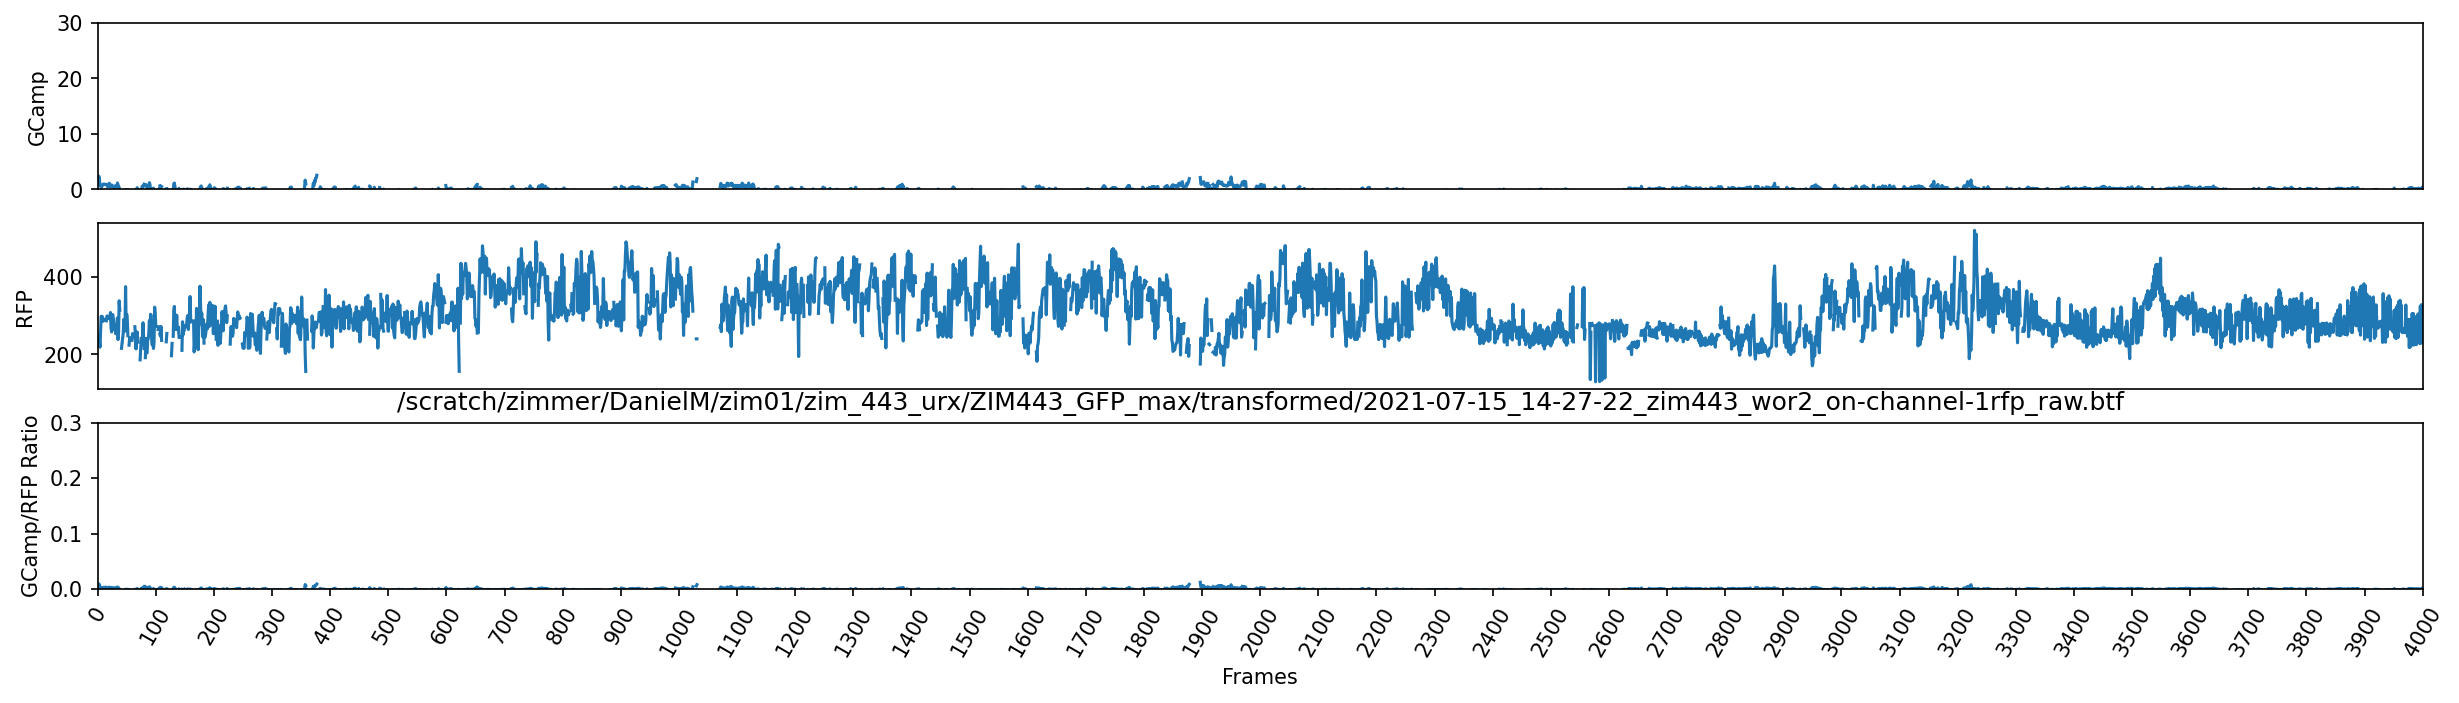

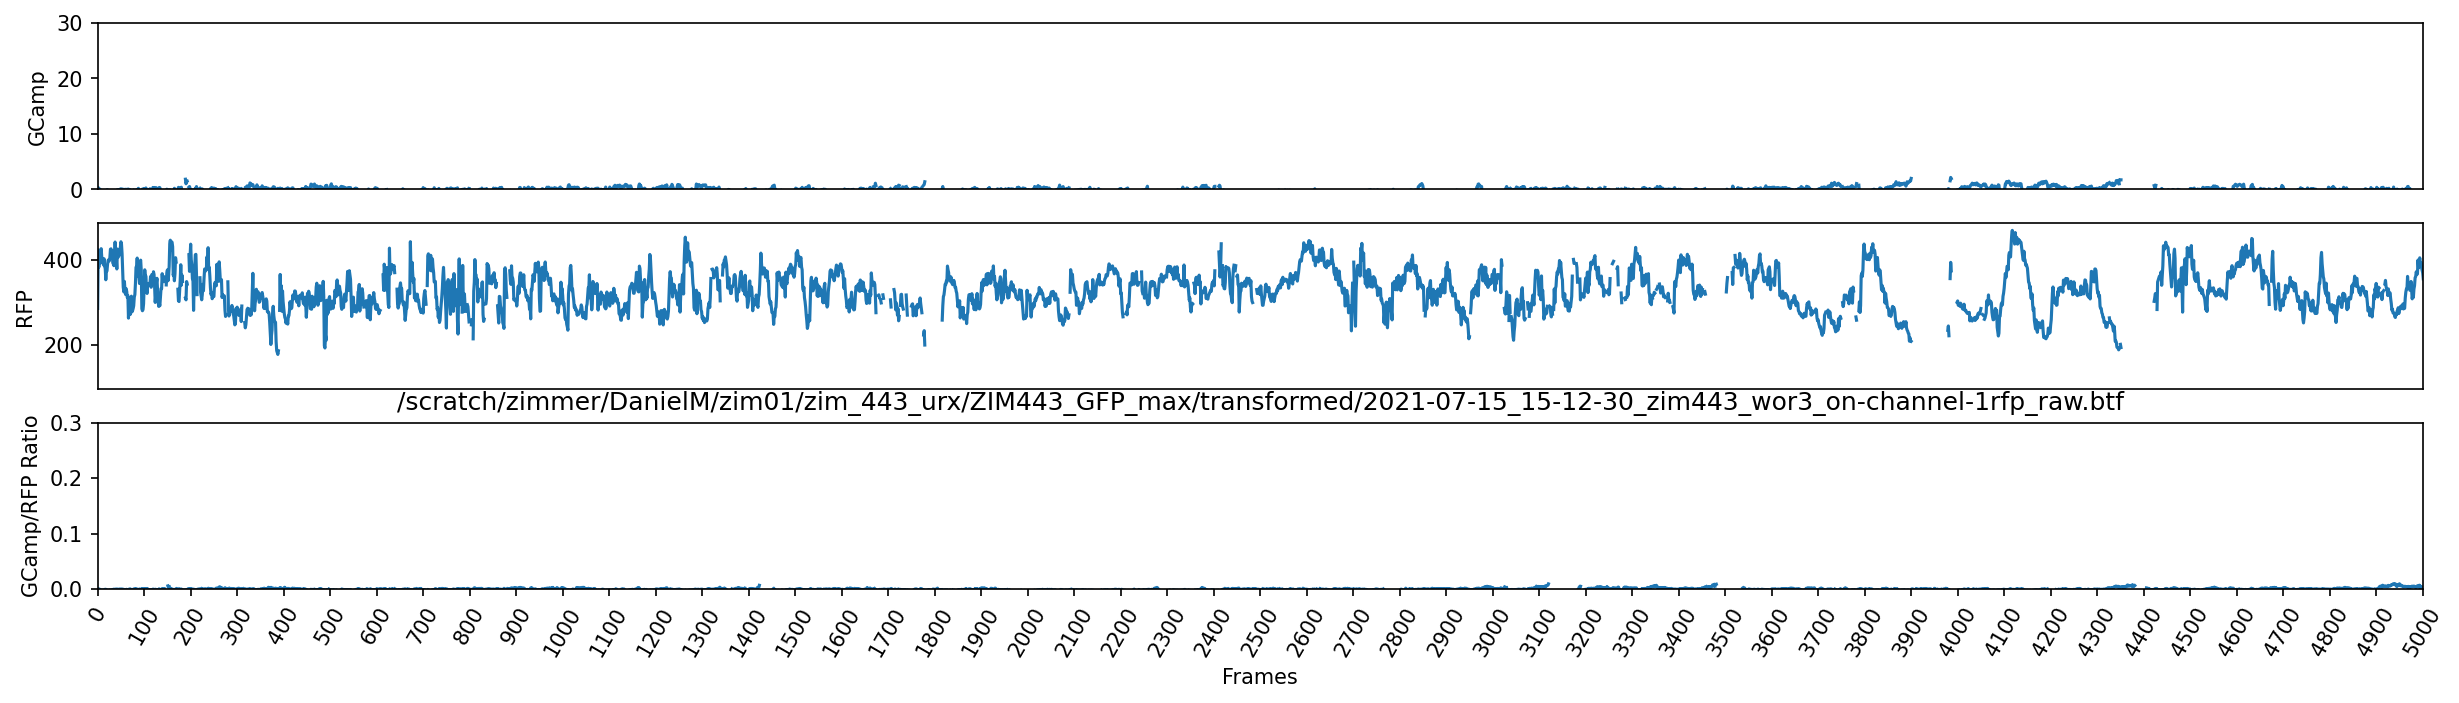

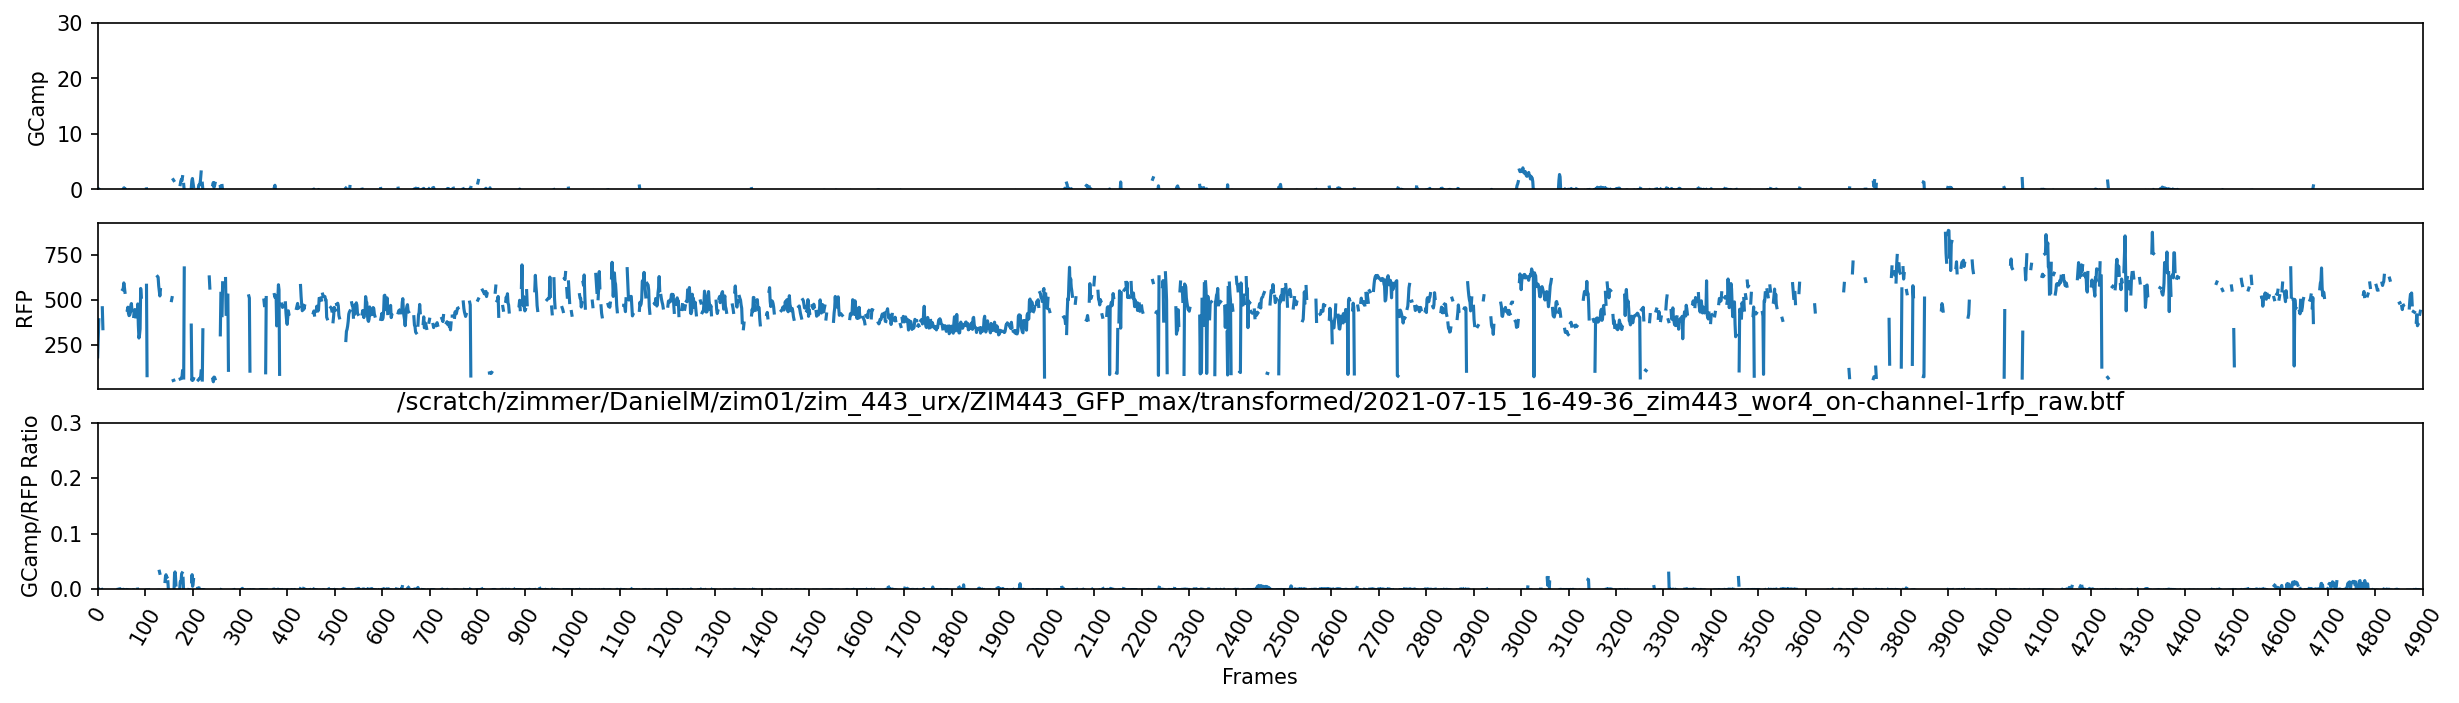

In [22]:
background_green=104
background_red=104
rfp_mask=Path(r'/scratch/zimmer/DanielM/zim01/zim_443_urx/ZIM443_RFP_max/binary/')
for idx in range(len(gcamp_path_list)-1):
    rfp_mask_filepath=rfp_path_list[idx]
    gcamp_filepath=gcamp_path_list[idx]
    rfp_filepath=rfp_path_list[idx]
    rfp_mask_filepath=rfp_path_mask_list[idx]
    gcamp_signal, rfp_signal=ca_image.calculate_signal(rfp_filepath,rfp_mask_filepath,gcamp_filepath,background_green,background_red)
    axes=ca_image.plot_gcamp_rfp_ratio(gcamp_signal,rfp_signal)

    #some modifications to the plot
    axes[0].set_ylim([0,30])
    for i,ax in enumerate(axes):
        ax.set_xlim([0, 4000])
        if i<2: 
            ax.set_xticks([])
        if i==2:
            ax.tick_params(axis='x', labelrotation = 60)
            ax.xaxis.set_ticks(np.arange(0, len(gcamp_signal), 100))
            ax.set_ylim([0, 0.3])
            ax.set_xlabel('Frames')
    plt.title(gcamp_path_list[idx])

In [ ]:
plt.hist(gcamp[roi])
plt.hist(gcamp[roi2])

(array([38., 34., 26., 23., 17.,  4.,  0.,  1.,  0.,  1.]),
 array([301. , 320.6, 340.2, 359.8, 379.4, 399. , 418.6, 438.2, 457.8,
        477.4, 497. ]),
 <a list of 10 Patch objects>)

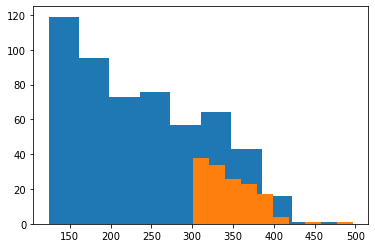

In [162]:
plt.hist(rfp[roi])
plt.hist(rfp[roi2])


In [157]:
#convert list to numpy array
gcamp_signal=np.array(gcamp_signal)
rfp_signal=np.array(rfp_signal)


In [40]:
#remove background (TODO: improve background calculation)
gcamp_signal=gcamp_signal-104
rfp_signal=rfp_signal-104

In [76]:
#find frames where there is no signal
np.where(np.isnan(gcamp_signal))

(array([ 288,  289,  290, ..., 9980, 9981, 9982]),)

In [77]:
#check % of frames without signal
np.isnan(gcamp_signal).sum()/gcamp_signal.shape[0]

0.3439847741159972

### Stack Subsampling

For instance the behaviour to have same number of frames as max projections (default is number of frames == total number of planes)

In [41]:
input_filepath='/scratch/zimmer/DanielM/bag_zim_06/9.9/2021-09-06bag_zim06/btiffs/2021-09-06_19-05-32_worm4_on-channel-1-Andor9046bigtiff.btf'
output_filepath='/scratch/zimmer/DanielM/bag_zim_06/9.9/2021-09-06bag_zim06/btiffs/2021-09-06_19-05-32_worm4_on-channel-1-Andor9046bigtiff_subsampled.btf'
with tiff.TiffFile(input_filepath, multifile=False) as tif,\
 tiff.TiffWriter(output_filepath, bigtiff=True) as tif_writer:
    for i, page in enumerate(tif.pages):
        if i %6==0:
            img=page.asarray()
            tif_writer.write(img,contiguous=True)
            

/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: TiffFile: the 'multifile' argument is ignored
  This is separate from the ipykernel package so we can avoid doing imports until
